# Classification

### Import the dataset

In [1]:
import pandas as pd
df=pd.read_csv('df').drop('Unnamed: 0',axis=1)

In [2]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

## TF-IDF vectorization method

In [3]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lowerplot'])

In [6]:
import numpy as np
dbscan = DBSCAN(eps=1, min_samples=7).fit(X)
labels = dbscan.fit_predict(X)

unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters:', n_clusters)
print('Number of noise points:', n_noise)
for label in unique_labels:
    if label == -1:
        print('Noise points:', list(labels).count(label))
    else:
        print('Cluster', label, ':', list(labels).count(label))

Number of clusters: 9
Number of noise points: 1003
Noise points: 1003
Cluster 0 : 18
Cluster 1 : 30
Cluster 2 : 7
Cluster 3 : 7
Cluster 4 : 18
Cluster 5 : 15
Cluster 6 : 15
Cluster 7 : 9
Cluster 8 : 5


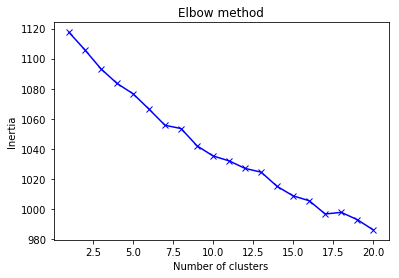

In [5]:
inertias = []
K = range(1,21)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
#plt.savefig('elbow')
plt.show()

## Clustering  K-means

In [44]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
labels = kmeans.labels_
df['clusters'] = labels

### k=10 clusters

In [26]:
#df[df['clusters'] == 7]

,Nom et prénom,Numéro de téléphone,Service proposé,lowerplot,clusters
71,Claude Martin,0615113085,entretien du jardin et des espaces extérieurs,entretien jardin espaces extérieurs,7
565,Joséphine Levy-Collin,0675624280,Arrosage de votre jardin potager,arrosage jardin potager,7
601,Dominique Petitjean,0613896143,Entretien du jardin,entretien jardin,7
616,Honoré Bodin,0657528658,Désherbage de jardin,désherbage jardin,7
999,Marianne Seguin,0681334631,J'offre mes services pour l'entretien de votre...,joffre service lentretien jardin,7
1000,Étienne Mahe,0608426291,Besoin d'un coup de main pour votre jardin ? J...,besoin dun coup main jardin là,7
1001,Yves Le Boutin,0641640900,Je suis un jardinier passionné et je propose m...,jardinier passionné propose service lentretien...,7
1003,Constance Sauvage,0612143150,Confiez-moi l'entretien de votre jardin et pro...,confiezmoi lentretien jardin profitez dun espa...,7
1005,Manon Bertin,0646107540,Je suis un passionné de la nature et je prendr...,passionné nature prendrai soin jardin comme si...,7
1006,Christelle Dubois,0692934744,J'offre des services d'entretien de pelouse po...,joffre service dentretien pelouse gazon parfait,7


* Cluster 0 : Coaching 
* Cluster 1 : Art and Design
* Cluster 2 : Personal and Business Assistance
* Cluster 3 : Stay at home services!
* Cluster 4 : Management and Support
* Cluster 5 : Courses in all disciplines
* Cluster 6 : Fully customized services
* Cluster 7 : Gardening
* Cluster 8 : All local agents
* Cluster 9 : Care services

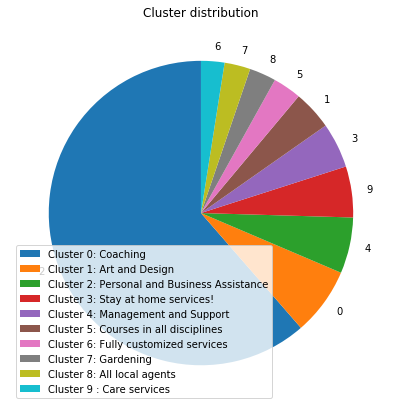

In [47]:
import matplotlib.pyplot as plt
cluster_counts = df['clusters'].value_counts()
fig, ax = plt.subplots(figsize=(7,7)) # Définir la taille de la figure
ax.pie(cluster_counts, labels=cluster_counts.index, startangle=90)#, autopct='%1.1f%%'
legend_labels = ['Cluster 0: Coaching', 'Cluster 1: Art and Design', 'Cluster 2: Personal and Business Assistance', 
'Cluster 3: Stay at home services!',
'Cluster 4: Management and Support',
'Cluster 5: Courses in all disciplines',
'Cluster 6: Fully customized services',
'Cluster 7: Gardening',
'Cluster 8: All local agents',
'Cluster 9 : Care services']
ax.legend(legend_labels, loc='best')

ax.set_title('Cluster distribution')
plt.savefig('repclust')
plt.show()

# WordCloud

In [34]:
import nltk
#nltk.download('stopwords')

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string
from nltk.corpus import stopwords

#### For each cluster

In [53]:
df_bis = df[df['clusters'] == 6]
list0 = list(df_bis['Service proposé'])

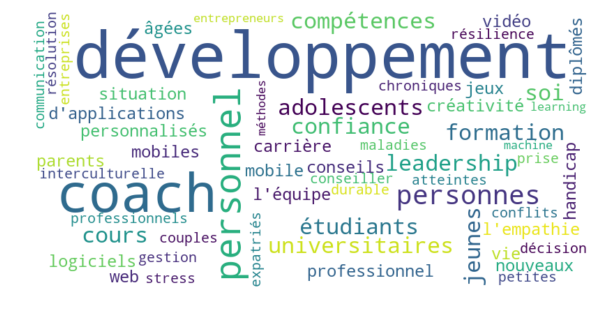

In [54]:
# Récupérer les phrases du cluster en question et les stocker dans une liste
phrases_cluster = list0

# Nettoyer les phrases
stopwords_list = stopwords.words('french')
punctuation = string.punctuation

cleaned_words = []
for phrase in phrases_cluster:
    words = phrase.lower().split()
    words = [word.strip(punctuation) for word in words if word not in stopwords_list]
    cleaned_words.extend(words)

# Compter le nombre d'occurrences de chaque mot dans les phrases du cluster
word_counts = Counter(cleaned_words)

# Créer l'objet WordCloud
wordcloud = WordCloud(background_color="white", width=800, height=400)

# Générer le word cloud
wordcloud.generate_from_frequencies(word_counts)

# Afficher le word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('clust9')
plt.show()